- LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import pearsonr

# Pengaturan untuk menampilkan semua kolom dan baris tanpa terpotong
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.max_rows', None)     # Tampilkan semua baris

import warnings
warnings.filterwarnings("ignore")

- LOAD DATA

In [2]:
df = pd.read_csv('Sample Data Technical Test Markethac Aug 2024.csv')
df.head(5)

,date,itemid,channel,listingname,salescount,daily_sales_count,daily_sales_value,categorychannel,shopname,city,province,rating,ratecount,remainstock,discount,saleprice,salestype,fsid,fsstart
0,2023-05-08,1729385653806401294,Tiktok,Sunscren Madame gie SPF 30 PA +++,452,3,98262,Facial Sunscreen & Sun Care,galerybeautysemarang,NaN,NaN,4.0,82.0,258,0,32754,regular sales,NaN,NaN
1,2023-05-08,1729510593066469833,Tiktok,SKINTIFIC All Day Light Sunscreen Mist SPF50 P...,183,1,89600,Facial Sunscreen & Sun Care,CL Beauty Library,NaN,NaN,4.0,36.0,23,0,89600,regular sales,NaN,NaN
2,2023-05-08,1729582821264689500,Tiktok,LAMEILA SVMY Sunscreen Sun Block Wajah SPF 50 ...,61,2,25200,Facial Sunscreen & Sun Care,Kooala Store,NaN,NaN,4.0,9.0,941,0,12600,regular sales,NaN,NaN
3,2023-05-08,11804054885,Shopee,EMINA Sun Battle SPF 30 PA+++ sunscreen 60 ml,873,4,54000,Sunscreen Wajah,byaroona,Batu,Jawa Timur,4.0,282.0,1,21,13500,regular sales,NaN,NaN
4,2023-05-08,21120947258,Shopee,FACETOLOGY Triple Care Sunscreen SPF 40+ PA+++...,14,1,74999,Sunscreen Wajah,gufy.official,Batu,Jawa Timur,5.0,2.0,986,0,74999,regular sales,NaN,NaN


- DATA OVERVIEW

In [3]:
def data_info(x):
    # Initialize sum_of_data to None
    sum_of_data = None
    
    # Check if data contains numeric columns
    if x.select_dtypes(include='number').shape[1] > 0:
        sum_of_data = x.select_dtypes(include='number').sum()
    
    data_type = x.dtypes
    n_unique = x.nunique()
    missing_values = x.isnull().sum()
    percent_missing = (missing_values/len(x))*100
    print(f'Number of Rows, Columns {x.shape}')
    print(f'Number of Duplicated Values {x.duplicated().sum()}')
    
    return pd.DataFrame({
        'sum_of_data': sum_of_data,
        'missing_values': missing_values,
        'percent_missing': percent_missing,
        'numbers_of_unique': n_unique,
        'data_type': data_type
    }).sort_values(by='missing_values', ascending=False)
    

# Function for selecting categorical and numerical variables
def categorical(x):
    categorical = list(x.columns[x.dtypes == 'object'])
    return categorical

def numerical(x):
    numerical = list(x.columns[x.dtypes == 'int64']) + list(x.columns[x.dtypes == 'float64'])
    return numerical
display(df.describe())
data_info(df)

,salescount,daily_sales_count,daily_sales_value,rating,ratecount,remainstock,saleprice,fsstart
count,981389.000000,981389.000000,9.813890e+05,977934.000000,977940.000000,9.813890e+05,9.813890e+05,0.0
mean,4131.561323,9.863481,4.439352e+05,4.094210,1370.839683,1.327699e+04,4.993714e+04,NaN
std,19616.204245,90.213271,3.407057e+06,0.386606,7229.105242,3.932773e+05,6.075618e+04,NaN
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN
25%,107.000000,1.000000,3.567000e+04,4.000000,35.000000,2.200000e+01,2.448500e+04,NaN
50%,426.000000,2.000000,7.500000e+04,4.000000,139.000000,1.100000e+02,3.500000e+04,NaN
75%,1857.000000,5.000000,1.890000e+05,4.000000,585.000000,6.840000e+02,5.580000e+04,NaN
max,612014.000000,43258.000000,8.197391e+08,5.000000,282483.000000,5.999998e+07,1.274430e+07,NaN


Number of Rows, Columns (981389, 19)
Number of Duplicated Values 0


,sum_of_data,missing_values,percent_missing,numbers_of_unique,data_type
fsstart,0.000000e+00,981389,100.000000,0,float64
fsid,NaN,977940,99.648559,499,object
province,NaN,223193,22.742562,31,object
rating,4.003868e+06,3455,0.352052,13562,float64
ratecount,1.340599e+09,3449,0.351441,25567,float64
city,NaN,539,0.054922,426,object
categorychannel,NaN,0,0.000000,7,object
channel,NaN,0,0.000000,4,object
discount,NaN,0,0.000000,265,object
daily_sales_count,9.679912e+06,0,0.000000,1254,int64


In [4]:
categorical_col = categorical(df)
numerical_col = numerical(df)

In [5]:
for x in numerical_col:
    print(f'========== {x} ==========')
    print(f'{df[x].unique()}')
    print(f'------------------------------------------------------------------------')

========== salescount ==========
[  452   183    61 ... 38727 55698 61223]
------------------------------------------------------------------------
========== daily_sales_count ==========
[    3     1     2 ...   705 43258  4969]
------------------------------------------------------------------------
========== daily_sales_value ==========
[ 98262  89600  25200 ... 164260 189660  69202]
------------------------------------------------------------------------
========== remainstock ==========
[  258    23   941 ... 19179 11866 26129]
------------------------------------------------------------------------
========== saleprice ==========
[ 32754  89600  12600 ...  44604 194910  69202]
------------------------------------------------------------------------
========== rating ==========
[4.         5.                nan ... 4.87759815 4.87669173 4.72260914]
------------------------------------------------------------------------
========== ratecount ==========
[8.2000e+01 3.6000e+01 9.000

In [6]:
for x in categorical_col:
    print(f'========== {x} ==========')
    print(f'{df[x].unique()}')
    print(f'------------------------------------------------------------------------')

========== date ==========
['2023-05-08' '2023-06-29' '2023-05-28' '2023-06-19' '2023-06-30'
 '2023-04-07' '2023-06-05' '2023-04-27' '2023-06-25' '2023-05-18'
 '2023-06-15' '2023-05-04' '2023-04-26' '2023-04-14' '2023-04-10'
 '2023-05-03' '2023-04-01' '2023-06-26' '2023-06-18' '2023-04-16'
 '2023-04-15' '2023-04-11' '2023-06-24' '2023-04-17' '2023-05-13'
 '2023-04-12' '2023-05-05' '2023-06-12' '2023-04-22' '2023-04-02'
 '2023-04-29' '2023-05-10' '2023-05-23' '2023-04-08' '2023-05-22'
 '2023-06-02' '2023-05-14' '2023-04-23' '2023-06-28' '2023-04-19'
 '2023-05-12' '2023-04-03' '2023-05-07' '2023-05-16' '2023-05-01'
 '2023-05-24' '2023-04-09' '2023-06-06' '2023-06-11' '2023-04-30'
 '2023-04-24' '2023-05-31' '2023-05-29' '2023-05-19' '2023-05-02'
 '2023-06-03' '2023-05-11' '2023-05-17' '2023-06-09' '2023-06-10'
 '2023-06-07' '2023-05-15' '2023-05-21' '2023-06-04' '2023-04-05'
 '2023-06-16' '2023-04-28' '2023-06-13' '2023-04-21' '2023-06-20'
 '2023-06-27' '2023-06-01' '2023-05-26' '2023-06-

- CLEANSING DATA

In [7]:
# Ubah kolom 'date' ke format datetime
df['date'] = pd.to_datetime(df['date'])

# Fungsi pembersihan diskon
def clean_discount(value):
    if isinstance(value, str):
        # Ekstrak angka dari format seperti "Save up to XX%" atau "-XX%"
        match = re.search(r'(-?\d+)', value)
        if match:
            return abs(int(match.group(1)))  # Konversi ke integer positif
    return None  # Jika tidak valid

# Terapkan pembersihan
df['cleaned_discount'] = df['discount'].apply(clean_discount)


def classify_product(product_name):
    # Klasifikasi berbasis aturan sederhana
    if product_name.lower() in [
        'sunscreen wajah', 'facial sunscreen & sun care', 'sunblock wajah']:
        return 'Sunscreen'
    elif product_name.lower() in [
        'bedak', 'powder', 'bedak wajah', 'face powder & cushion']:
        return 'Bedak'
    else:
        return 'Make Up Remover'
    
df['categoryproduct'] = df['categorychannel'].apply(classify_product)

df['rating'] = df['rating'].round(1)
df['rating'] = df['rating'].fillna(0)

In [8]:
df.head()

,date,itemid,channel,listingname,salescount,daily_sales_count,daily_sales_value,categorychannel,shopname,city,province,rating,ratecount,remainstock,discount,saleprice,salestype,fsid,fsstart,cleaned_discount,categoryproduct
0,2023-05-08,1729385653806401294,Tiktok,Sunscren Madame gie SPF 30 PA +++,452,3,98262,Facial Sunscreen & Sun Care,galerybeautysemarang,NaN,NaN,4.0,82.0,258,0,32754,regular sales,NaN,NaN,0,Sunscreen
1,2023-05-08,1729510593066469833,Tiktok,SKINTIFIC All Day Light Sunscreen Mist SPF50 P...,183,1,89600,Facial Sunscreen & Sun Care,CL Beauty Library,NaN,NaN,4.0,36.0,23,0,89600,regular sales,NaN,NaN,0,Sunscreen
2,2023-05-08,1729582821264689500,Tiktok,LAMEILA SVMY Sunscreen Sun Block Wajah SPF 50 ...,61,2,25200,Facial Sunscreen & Sun Care,Kooala Store,NaN,NaN,4.0,9.0,941,0,12600,regular sales,NaN,NaN,0,Sunscreen
3,2023-05-08,11804054885,Shopee,EMINA Sun Battle SPF 30 PA+++ sunscreen 60 ml,873,4,54000,Sunscreen Wajah,byaroona,Batu,Jawa Timur,4.0,282.0,1,21,13500,regular sales,NaN,NaN,21,Sunscreen
4,2023-05-08,21120947258,Shopee,FACETOLOGY Triple Care Sunscreen SPF 40+ PA+++...,14,1,74999,Sunscreen Wajah,gufy.official,Batu,Jawa Timur,5.0,2.0,986,0,74999,regular sales,NaN,NaN,0,Sunscreen


In [9]:
df['rating'].unique()

array([4. , 5. , 0. , 3. , 2. , 4.5, 4.4, 4.8, 4.7, 4.9, 4.6, 4.2, 4.3,
       4.1, 3.9, 3.3, 3.5, 3.2, 2.6, 3.1, 3.7, 3.8, 3.4, 2.5, 3.6, 2.7])

- EDA

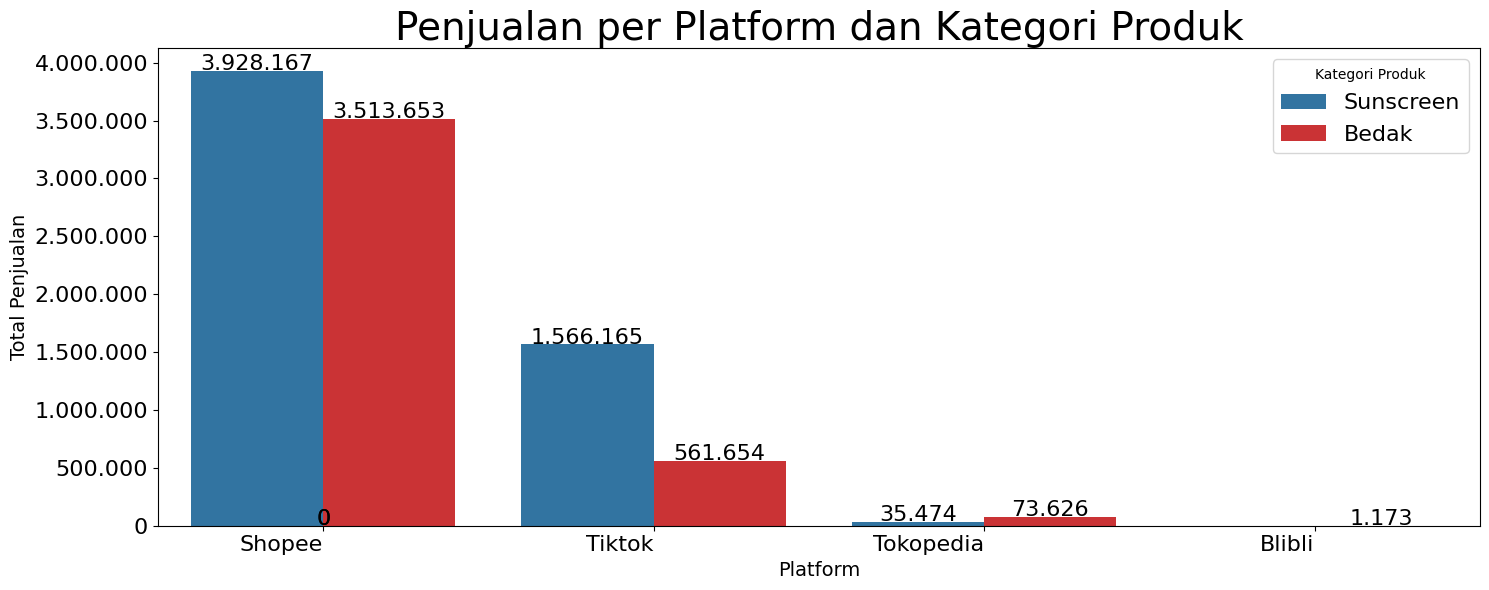

In [10]:
# Menambahkan kolom bulan dari kolom tanggal
df['month'] = df['date'].dt.month_name()

# Menghitung jumlah penjualan bulanan per kategori
monthly_sales = df.groupby(['month', 'categoryproduct'])['daily_sales_count'].sum().reset_index()

# Mengurutkan bulan agar sesuai dengan urutan kalender
month_order = ["April", "May", "June"]
monthly_sales['month'] = pd.Categorical(monthly_sales['month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values('daily_sales_count', ascending=False)

# Penjualan berdasarkan platform dan kategori produk
channel_sales = df.groupby(['channel', 'categoryproduct'])['daily_sales_count'].sum().reset_index()

# Mengurutkan berdasarkan jumlah penjualan terbanyak
channel_sales = channel_sales.sort_values(by='daily_sales_count', ascending=False)

# Membuat palet warna dengan warna khusus untuk kategori
palette_custom = {
    'Sunscreen': sns.color_palette("Paired")[1],  # Paired 1
    'Bedak': sns.color_palette("Paired")[5]       # Paired 4
}

# Visualisasi menggunakan seaborn (Penjualan per Platform dan Kategori Produk)
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=channel_sales, x='channel', y='daily_sales_count', hue='categoryproduct', palette=palette_custom)
ax.set_title("Penjualan per Platform dan Kategori Produk", fontsize=28)
ax.set_xlabel("Platform", fontsize=14)
ax.set_ylabel("Total Penjualan", fontsize=14)

# Mengatur ukuran font pada axis
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Menambahkan anotasi label pada setiap bar dengan format angka ribuan
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{int(height):,}'.replace(",", "."), 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Mengatur format angka pada axis y agar tidak dalam notasi ilmiah
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}".replace(",", ".")))

# Menampilkan legenda dengan penyesuaian
plt.legend(title="Kategori Produk", fontsize=16)
plt.xticks(rotation=0, ha='right', fontsize=16)
plt.tight_layout()
plt.show()



Korelasi antara rating dan penjualan: -0.04
Nilai p-value: 0.0000 (menentukan signifikansi statistik)


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

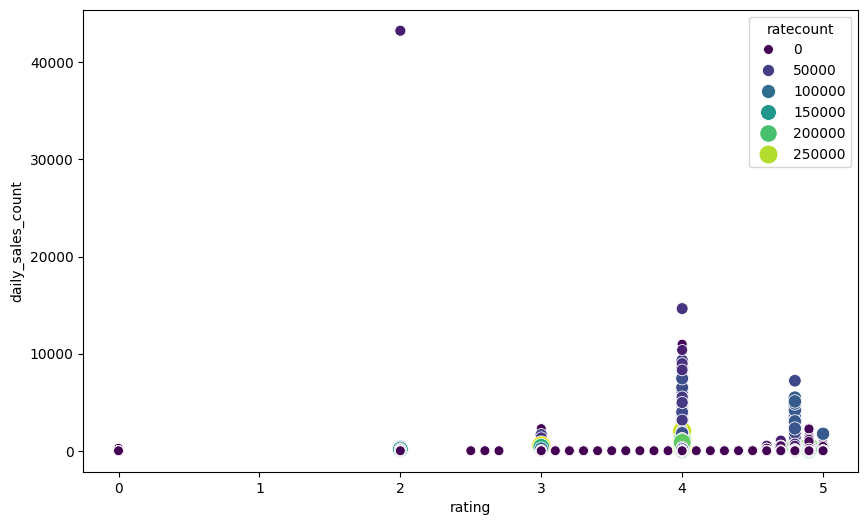

In [ ]:
# Menghitung korelasi antara rating dan salescount
correlation, p_value = pearsonr(df['rating'], df['daily_sales_count'])

# Menampilkan hasil korelasi
print(f"Korelasi antara rating dan penjualan: {correlation:.2f}")
print(f"Nilai p-value: {p_value:.4f} (menentukan signifikansi statistik)")

# Scatter plot dengan hue diubah menjadi peta warna yang kompatibel
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='rating',
    y='daily_sales_count',
    hue='ratecount',
    palette='viridis',
    size='ratecount',
    sizes=(50, 200),
)

# Membuat colorbar berdasarkan 'hue'
norm = plt.Normalize(df['ratecount'].min(), df['ratecount'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Jumlah Ulasan")

# Judul dan label
plt.title("Hubungan antara Rating dan Penjualan")
plt.xlabel("Rating Toko (1 angka di belakang koma)")
plt.ylabel("Jumlah Penjualan")
plt.grid(True)
plt.show()


In [36]:
df.head()

,date,itemid,channel,listingname,salescount,daily_sales_count,daily_sales_value,categorychannel,shopname,city,province,rating,ratecount,remainstock,discount,saleprice,salestype,fsid,fsstart,cleaned_discount,categoryproduct,month,week_of_year,month_week,day_of_week,week_of_month,price_range
0,2023-05-08,1729385653806401294,Tiktok,Sunscren Madame gie SPF 30 PA +++,452,3,98262,Facial Sunscreen & Sun Care,galerybeautysemarang,NaN,NaN,4.0,82.0,258,0,32754,regular sales,NaN,NaN,0,Sunscreen,May,19,May - 2,Monday,2,25-50K
1,2023-05-08,1729510593066469833,Tiktok,SKINTIFIC All Day Light Sunscreen Mist SPF50 P...,183,1,89600,Facial Sunscreen & Sun Care,CL Beauty Library,NaN,NaN,4.0,36.0,23,0,89600,regular sales,NaN,NaN,0,Sunscreen,May,19,May - 2,Monday,2,75-100K
2,2023-05-08,1729582821264689500,Tiktok,LAMEILA SVMY Sunscreen Sun Block Wajah SPF 50 ...,61,2,25200,Facial Sunscreen & Sun Care,Kooala Store,NaN,NaN,4.0,9.0,941,0,12600,regular sales,NaN,NaN,0,Sunscreen,May,19,May - 2,Monday,2,0-25K
3,2023-05-08,11804054885,Shopee,EMINA Sun Battle SPF 30 PA+++ sunscreen 60 ml,873,4,54000,Sunscreen Wajah,byaroona,Batu,Jawa Timur,4.0,282.0,1,21,13500,regular sales,NaN,NaN,21,Sunscreen,May,19,May - 2,Monday,2,0-25K
4,2023-05-08,21120947258,Shopee,FACETOLOGY Triple Care Sunscreen SPF 40+ PA+++...,14,1,74999,Sunscreen Wajah,gufy.official,Batu,Jawa Timur,5.0,2.0,986,0,74999,regular sales,NaN,NaN,0,Sunscreen,May,19,May - 2,Monday,2,50-75K


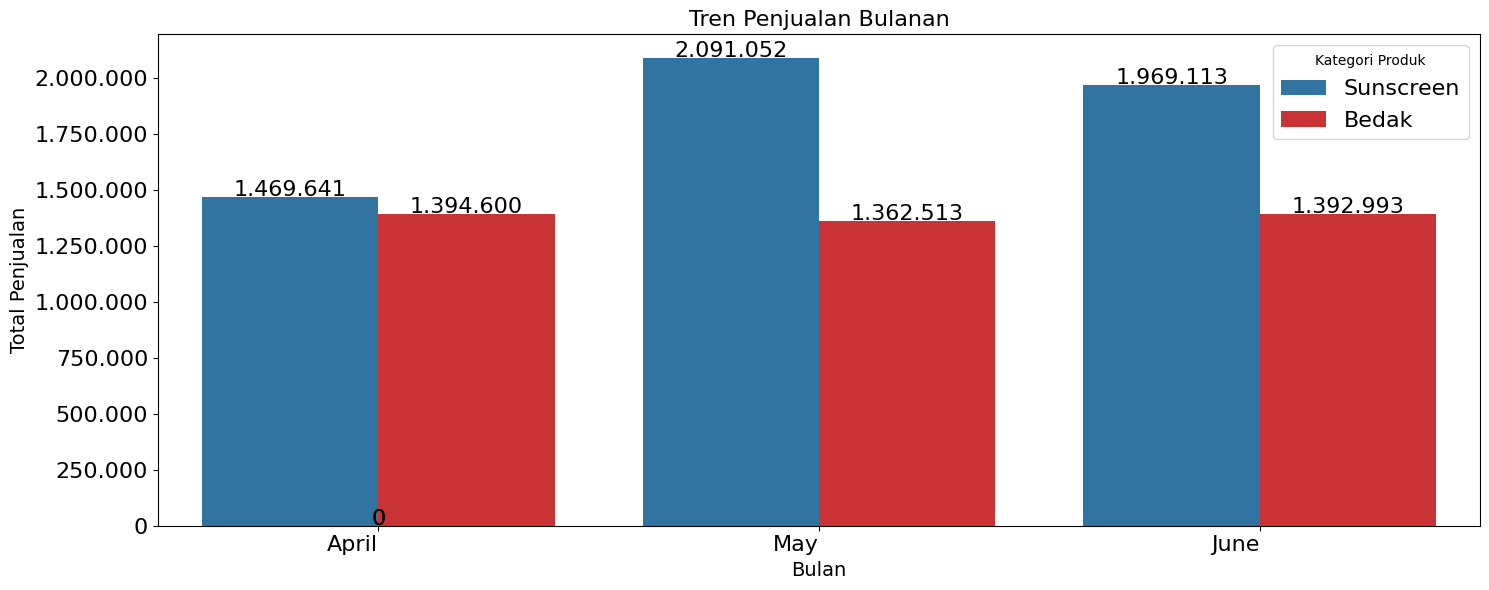

In [ ]:
# Visualisasi menggunakan seaborn (Tren Penjualan Bulanan)
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=monthly_sales, x='month', y='daily_sales_count', hue='categoryproduct', palette=palette_custom)
ax.set_title("Tren Penjualan Bulanan", fontsize=16)
ax.set_xlabel("Bulan", fontsize=14)
ax.set_ylabel("Total Penjualan", fontsize=14)

# Mengatur ukuran font pada axis
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Menambahkan anotasi label pada setiap bar dengan format angka ribuan
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{int(height):,}'.replace(",", "."), 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', fontsize=16, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Mengatur format angka pada axis y agar tidak dalam notasi ilmiah
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{int(x):,}".replace(",", ".")))

# Menampilkan legenda dengan penyesuaian
plt.legend(title="Kategori Produk", fontsize=16)
plt.xticks(rotation=0, ha='right', fontsize=16)
plt.tight_layout()
plt.show()

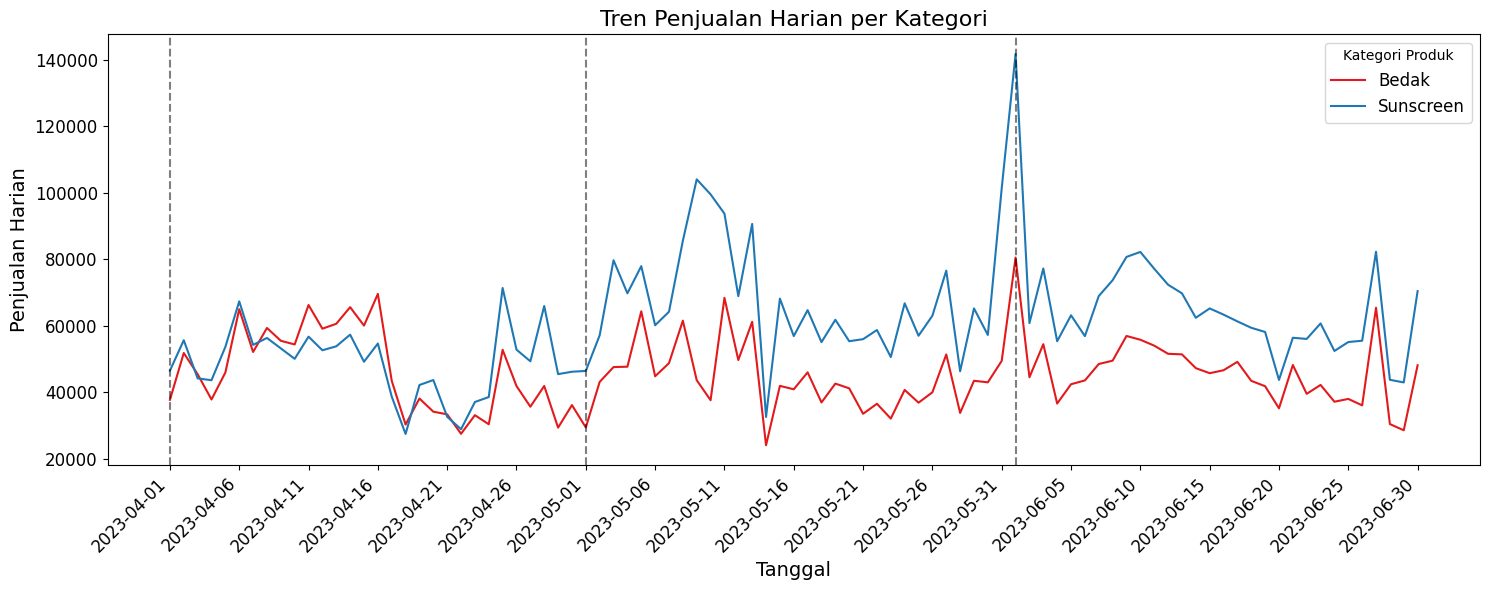

In [ ]:
# Visualisasi Tren Penjualan Harian untuk Dua Kategori
daily_trend = df.groupby(['date', 'categoryproduct'])['daily_sales_count'].sum().reset_index()
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=daily_trend, x='date', y='daily_sales_count', hue='categoryproduct', palette=palette_custom)
ax.set_title("Tren Penjualan Harian per Kategori", fontsize=16)
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Penjualan Harian", fontsize=14)

# Menambahkan garis vertikal untuk menandai awal setiap bulan
for date in pd.date_range(start=daily_trend['date'].min(), end=daily_trend['date'].max(), freq='MS'):
    plt.axvline(x=date, color='black', linestyle='--', alpha=0.5)

# Mengatur jarak antar tanggal pada sumbu x (setiap 5 hari)
ax.set_xticks(pd.date_range(start=daily_trend['date'].min(), end=daily_trend['date'].max(), freq='5D'))
ax.set_xticklabels(pd.date_range(start=daily_trend['date'].min(), end=daily_trend['date'].max(), freq='5D').strftime('%Y-%m-%d'), rotation=45, ha='right')

# Mengatur ukuran font pada axis
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Menampilkan legenda
plt.legend(title="Kategori Produk", fontsize=12)
plt.tight_layout()
plt.show()



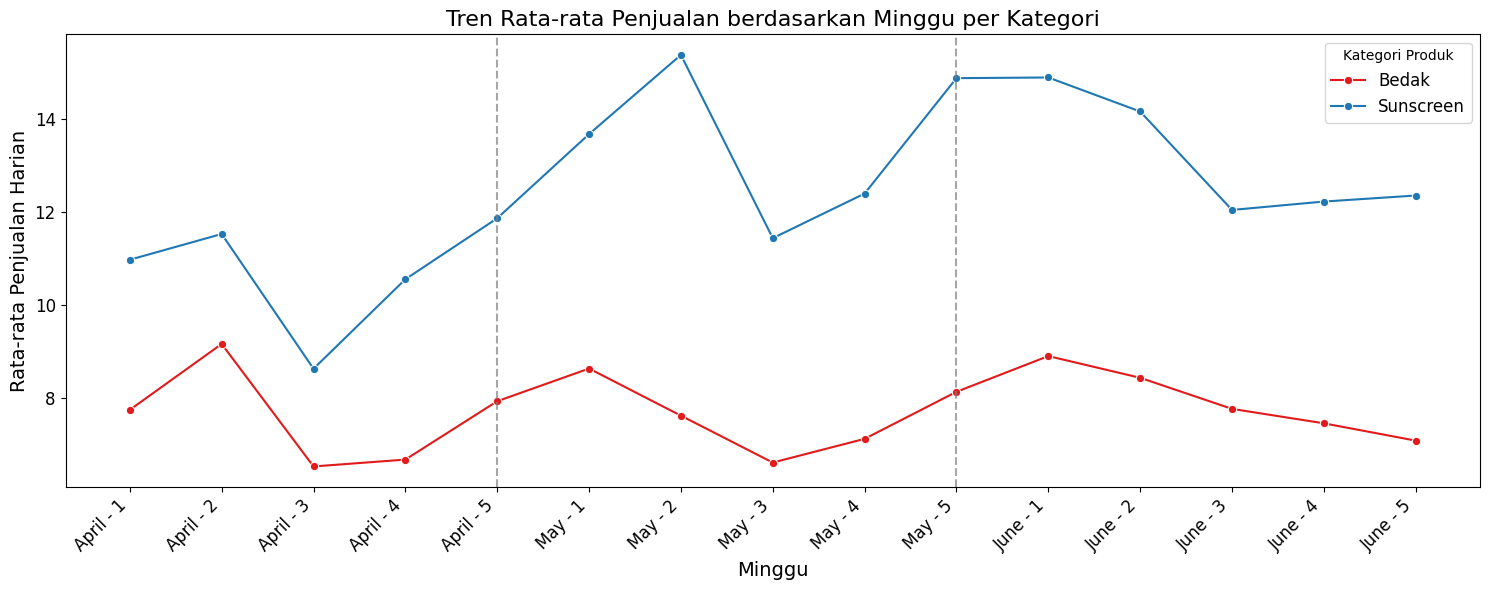

In [ ]:
df['week_of_year'] = df['date'].dt.isocalendar().week

# Menambahkan kolom label minggu dengan format "bulan - minggu ke-"
df['month_week'] = df['month'] + ' - ' + ((df['date'].dt.day - 1) // 7 + 1).astype(str)

# Menentukan urutan minggu secara manual dari April minggu pertama hingga Juni minggu kelima
week_order = [
    "April - 1", "April - 2", "April - 3", "April - 4", "April - 5",
    "May - 1", "May - 2", "May - 3", "May - 4", "May - 5",
    "June - 1", "June - 2", "June - 3", "June - 4", "June - 5"
]

# Menghitung rata-rata penjualan per minggu per kategori produk
weekly_avg_trend = df.groupby(['month_week', 'categoryproduct'])['daily_sales_count'].mean().reset_index()
weekly_avg_trend['month_week'] = pd.Categorical(weekly_avg_trend['month_week'], categories=week_order, ordered=True)
weekly_avg_trend = weekly_avg_trend.sort_values('month_week')

# Visualisasi tren rata-rata penjualan berdasarkan minggu ke berapa untuk setiap kategori
plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=weekly_avg_trend, x='month_week', y='daily_sales_count', hue='categoryproduct', marker="o", palette=palette_custom)
ax.set_title("Tren Rata-rata Penjualan berdasarkan Minggu per Kategori", fontsize=16)
ax.set_xlabel("Minggu", fontsize=14)
ax.set_ylabel("Rata-rata Penjualan Harian", fontsize=14)

# Menambahkan garis vertikal untuk membatasi setiap bulan
month_boundaries = ["April - 5", "May - 5"]
for boundary in month_boundaries:
    if boundary in weekly_avg_trend['month_week'].values:
        plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.7)

# Mengatur ukuran font pada axis
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Kategori Produk", fontsize=12)
plt.tight_layout()
plt.show()

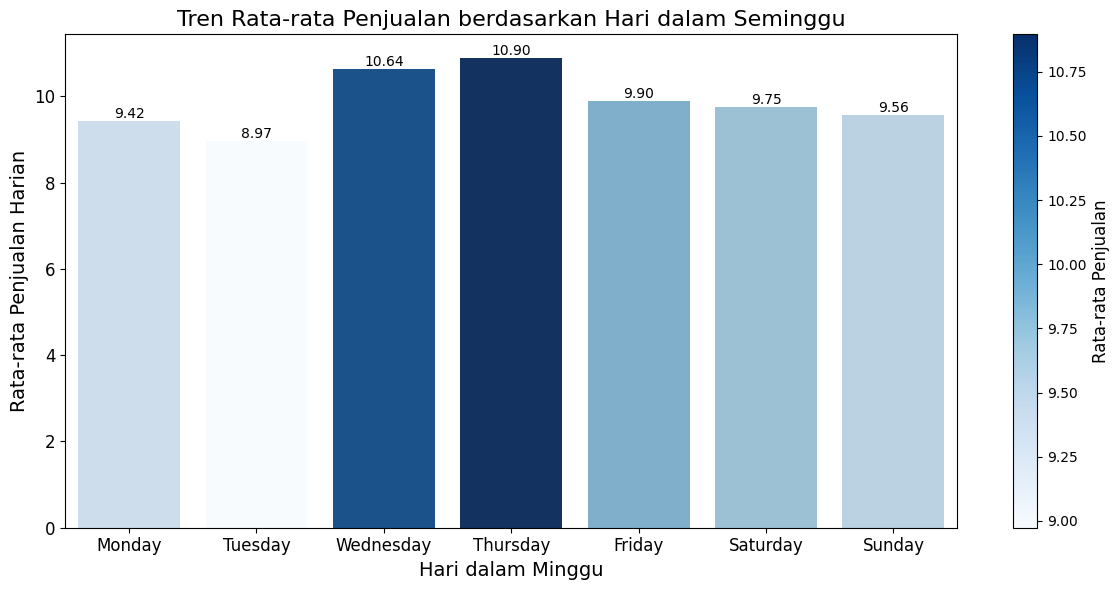

In [ ]:
# Menghitung rata-rata penjualan berdasarkan hari dalam seminggu
daily_trend = df.groupby('day_of_week')['daily_sales_count'].mean().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

# Membuat palet warna berdasarkan besar kecil nilai
daily_trend_values = daily_trend.values
norm = plt.Normalize(daily_trend_values.min(), daily_trend_values.max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
colors = [plt.cm.Blues(norm(value)) for value in daily_trend_values]

# Visualisasi tren rata-rata penjualan berdasarkan hari dalam seminggu dengan warna mengikuti nilai
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=daily_trend.index,
    y=daily_trend.values,
    palette=colors
)
ax.set_title("Tren Rata-rata Penjualan berdasarkan Hari dalam Seminggu", fontsize=16)
ax.set_xlabel("Hari dalam Minggu", fontsize=14)
ax.set_ylabel("Rata-rata Penjualan Harian", fontsize=14)

# Menambahkan anotasi nilai pada setiap bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cb = plt.colorbar(sm, ax=ax, orientation='vertical')
cb.set_label("Rata-rata Penjualan", fontsize=12)
plt.tight_layout()
plt.show()

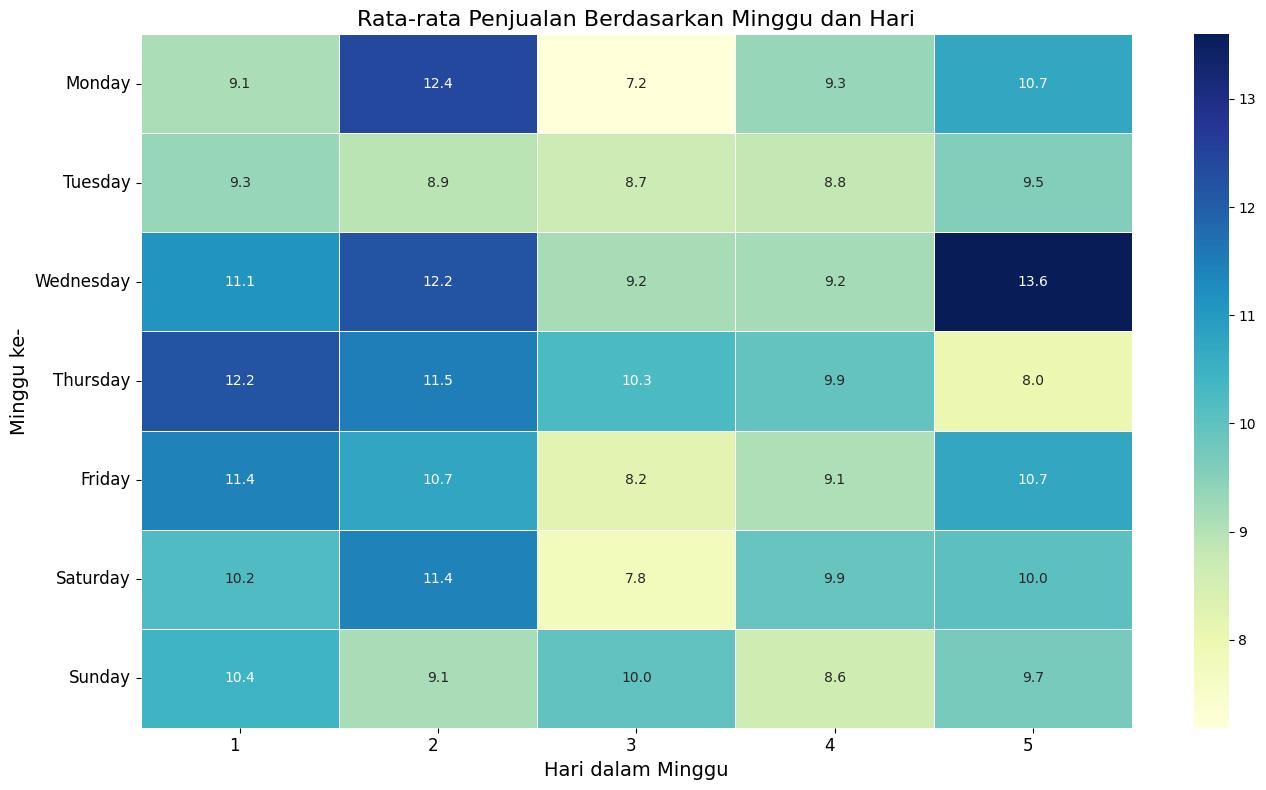

In [ ]:
# Menghitung rata-rata penjualan berdasarkan minggu ke berapa dan hari dalam minggu
df_avg_weekday = df.groupby(['week_of_month', 'day_of_week'])['daily_sales_count'].mean().reset_index()

# Mengurutkan hari dalam minggu agar sesuai urutan kalender
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_avg_weekday['day_of_week'] = pd.Categorical(df_avg_weekday['day_of_week'], categories=days_order, ordered=True)

# Visualisasi rata-rata penjualan berdasarkan minggu dan hari
plt.figure(figsize=(14, 8))
sns.heatmap(
    data=df_avg_weekday.pivot(index='day_of_week', columns='week_of_month', values='daily_sales_count'),
    cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5
)
plt.title("Rata-rata Penjualan Berdasarkan Minggu dan Hari", fontsize=16)
plt.xlabel("Hari dalam Minggu", fontsize=14)
plt.ylabel("Minggu ke-", fontsize=14)
plt.xticks(rotation=0, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

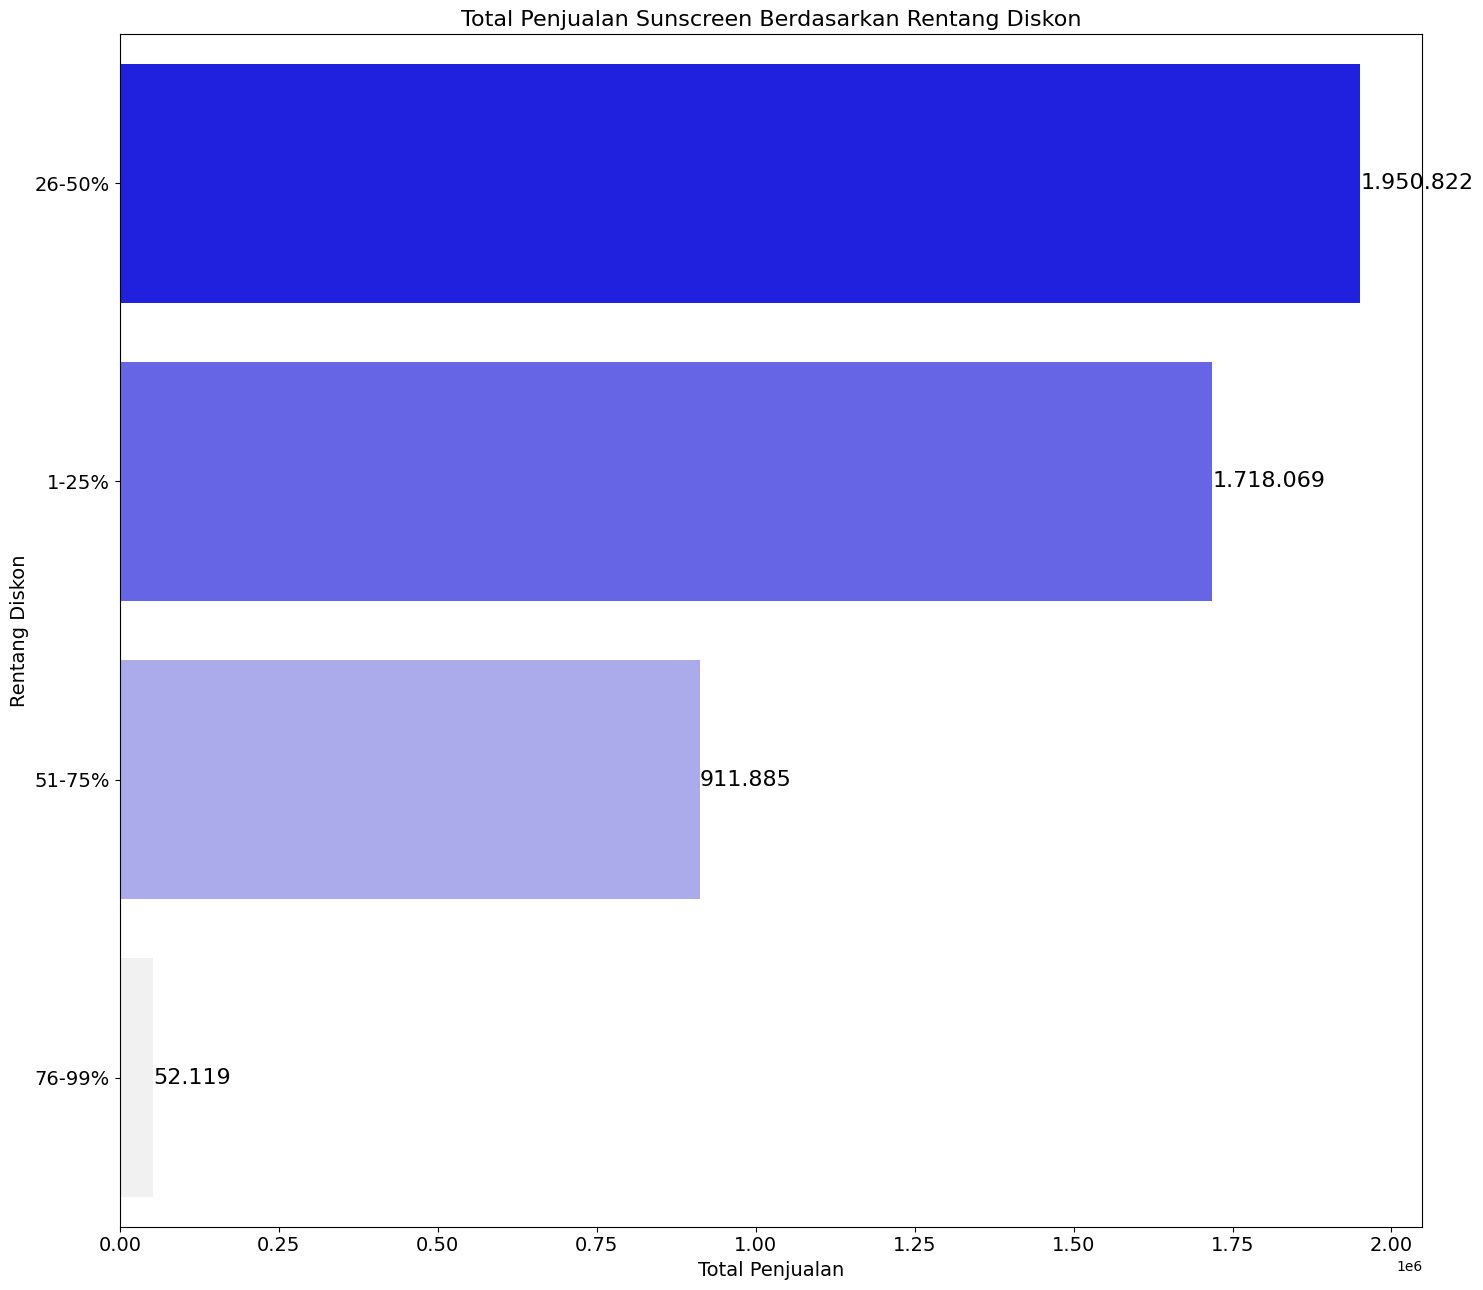

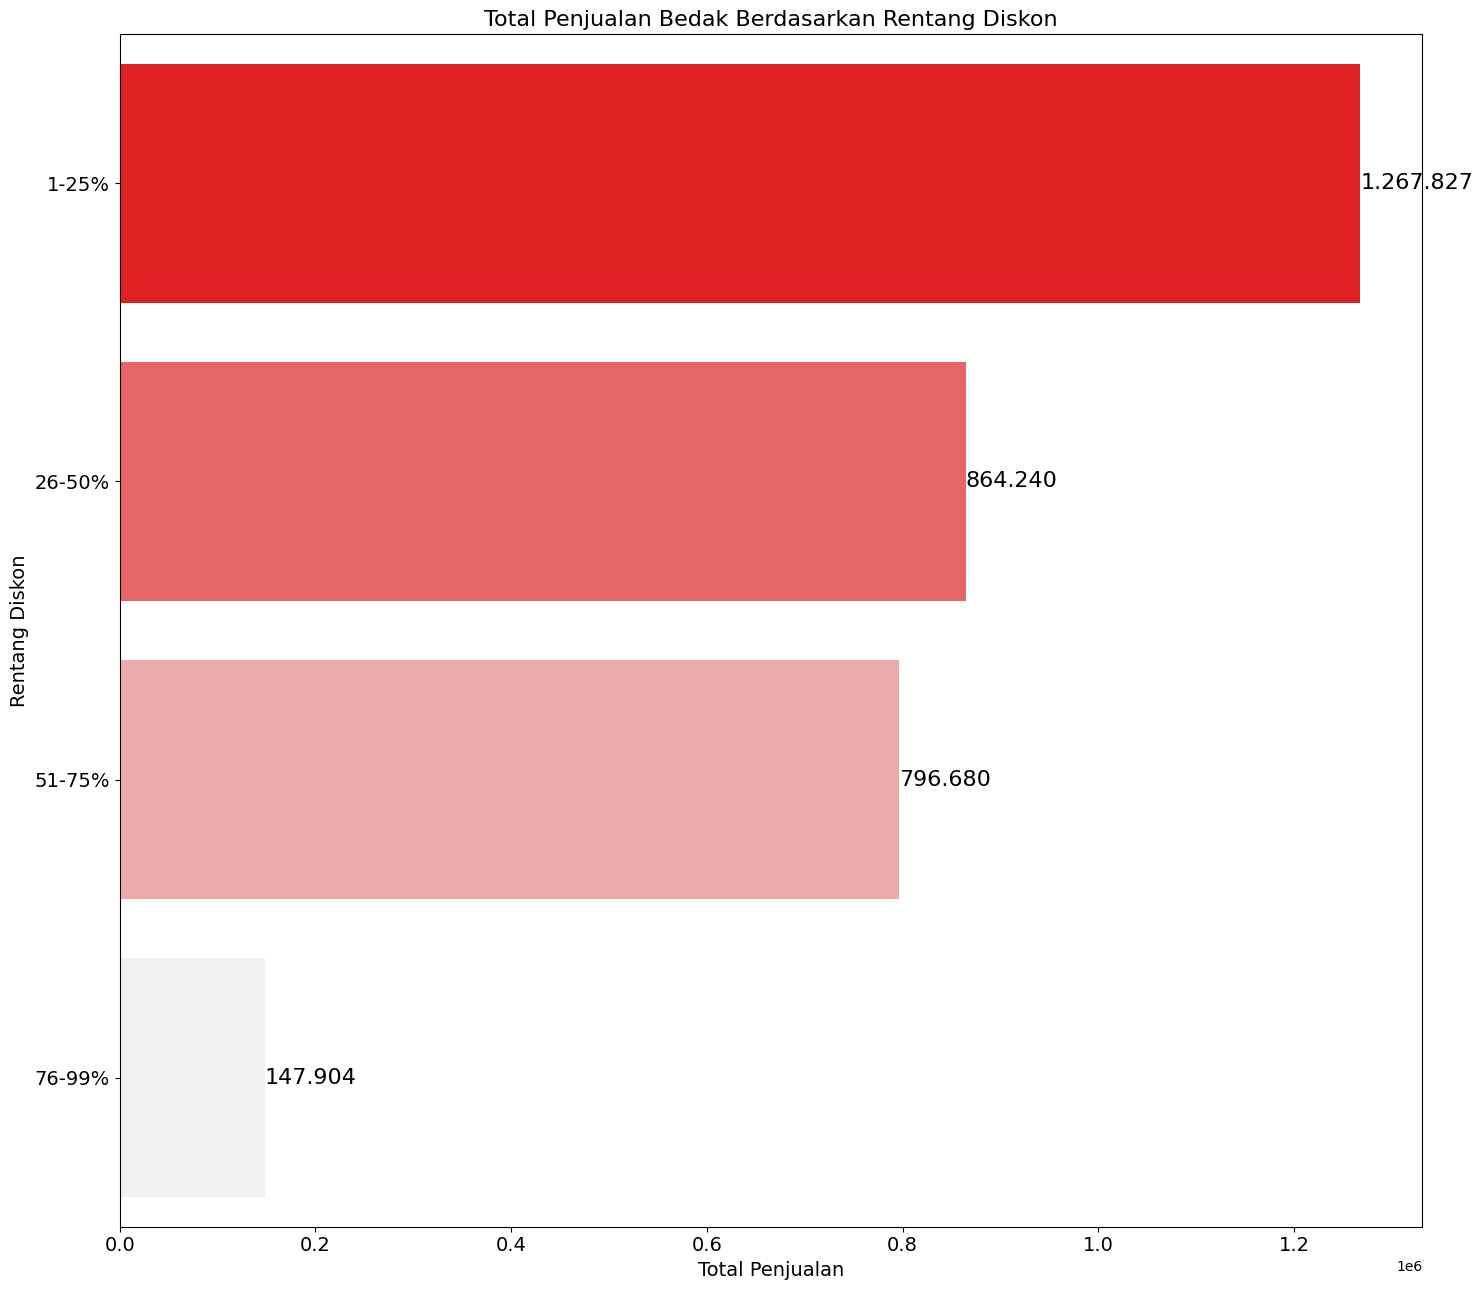

In [28]:
#Menghapus data dengan cleaned_discount 0
df_discount = df[df['cleaned_discount'] > 0]

# Membuat klasifikasi rentang diskon
def classify_discount(cleaned_discount):
    if cleaned_discount <= 25:
        return '1-25%'
    elif cleaned_discount <= 50:
        return '26-50%'
    elif cleaned_discount <= 75:
        return '51-75%'
    else:
        return '76-99%'

df_discount['discount_range'] = df_discount['cleaned_discount'].apply(classify_discount)

# Memisahkan data sunscreen dan bedak
df_sunscreen = df_discount[df_discount['categoryproduct'] == 'Sunscreen']
df_bedak = df_discount[df_discount['categoryproduct'] == 'Bedak']

# Menghitung total penjualan berdasarkan rentang diskon untuk sunscreen dan mengurutkannya
discount_summary_sunscreen = df_sunscreen.groupby('discount_range')['daily_sales_count'].sum().reset_index().sort_values(by='daily_sales_count', ascending=False)

# Menghitung total penjualan berdasarkan rentang diskon untuk bedak dan mengurutkannya
discount_summary_bedak = df_bedak.groupby('discount_range')['daily_sales_count'].sum().reset_index().sort_values(by='daily_sales_count', ascending=False)

# Visualisasi total penjualan berdasarkan rentang diskon untuk sunscreen
plt.figure(figsize=(15, 13))
ax = sns.barplot(
    data=discount_summary_sunscreen,
    y='discount_range',
    x='daily_sales_count',
    palette=sns.light_palette("blue", n_colors=len(discount_summary_sunscreen), reverse=True)
)
ax.set_title("Total Penjualan Sunscreen Berdasarkan Rentang Diskon", fontsize=16)
ax.set_ylabel("Rentang Diskon", fontsize=14)
ax.set_xlabel("Total Penjualan", fontsize=14)

# Menambahkan anotasi nilai pada setiap bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}'.replace(",", "."), (width, p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=16, color='black')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# Visualisasi total penjualan berdasarkan rentang diskon untuk bedak
plt.figure(figsize=(15, 13))
ax = sns.barplot(
    data=discount_summary_bedak,
    y='discount_range',
    x='daily_sales_count',
    palette=sns.light_palette("red", n_colors=len(discount_summary_bedak), reverse=True)
)
ax.set_title("Total Penjualan Bedak Berdasarkan Rentang Diskon", fontsize=16)
ax.set_ylabel("Rentang Diskon", fontsize=14)
ax.set_xlabel("Total Penjualan", fontsize=14)

# Menambahkan anotasi nilai pada setiap bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}'.replace(",", "."), (width, p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=16, color='black')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

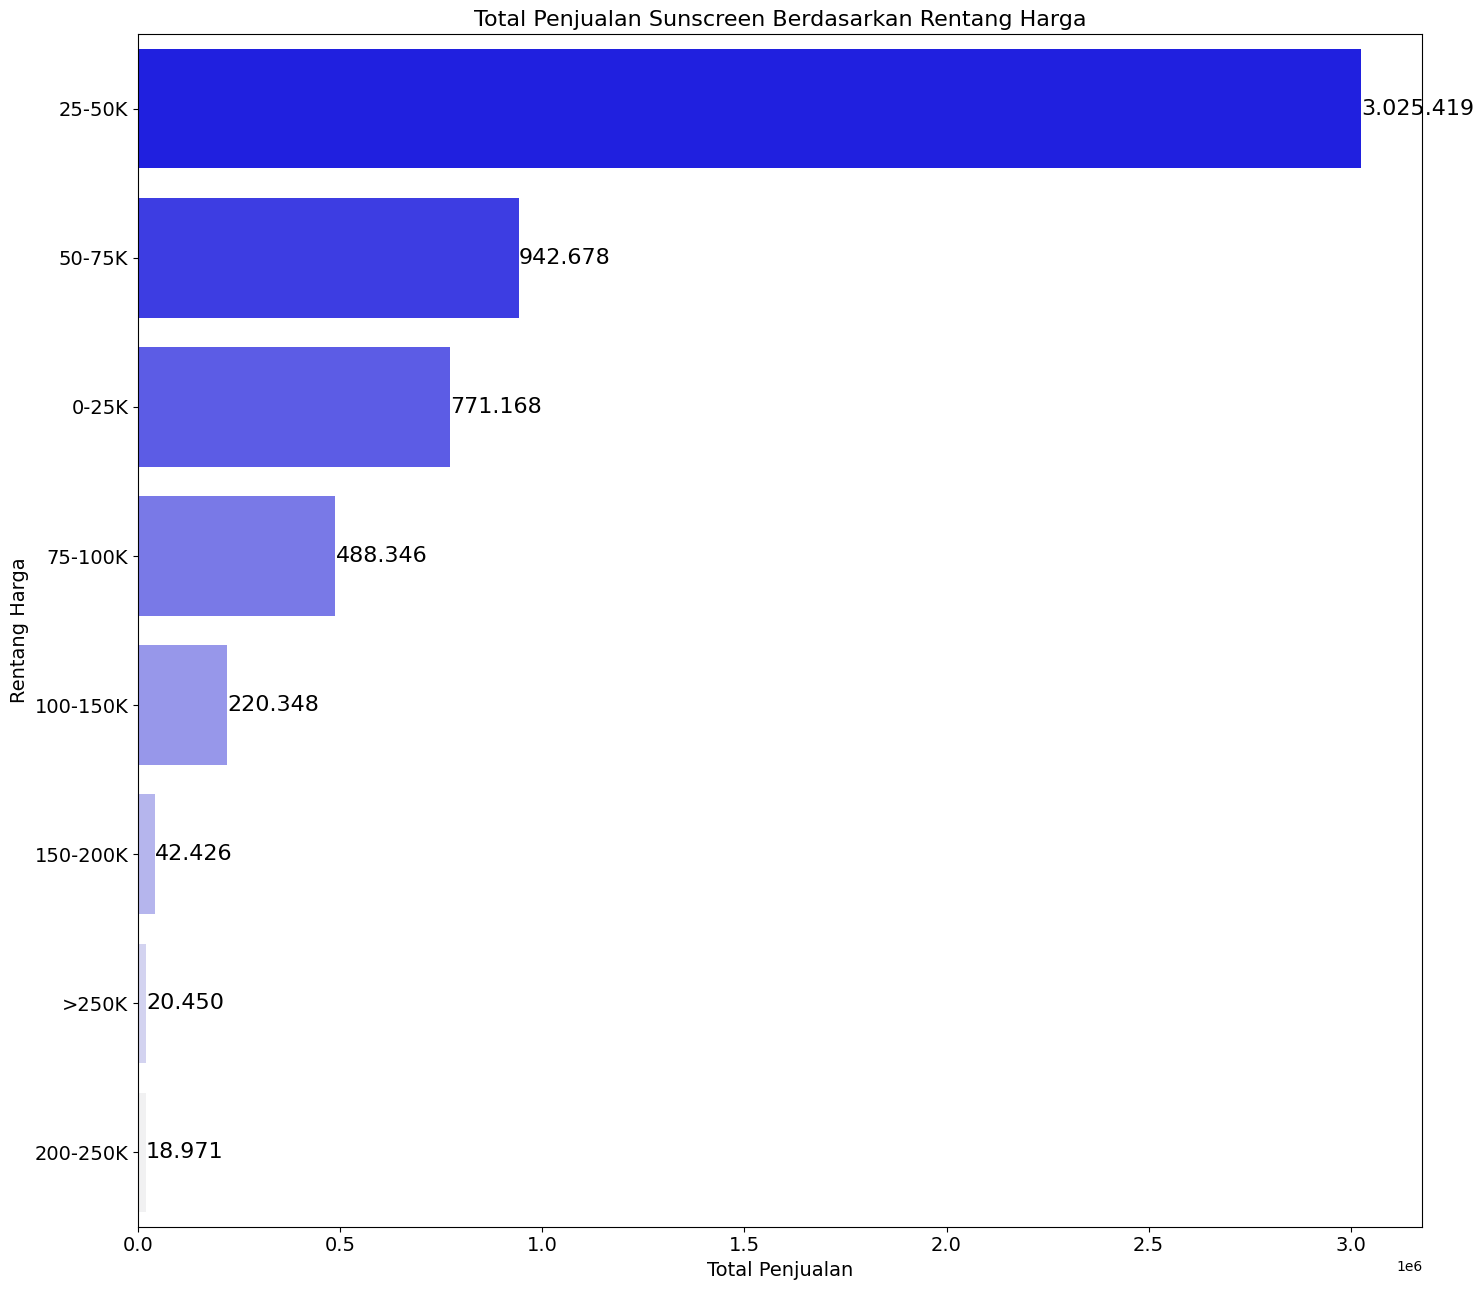

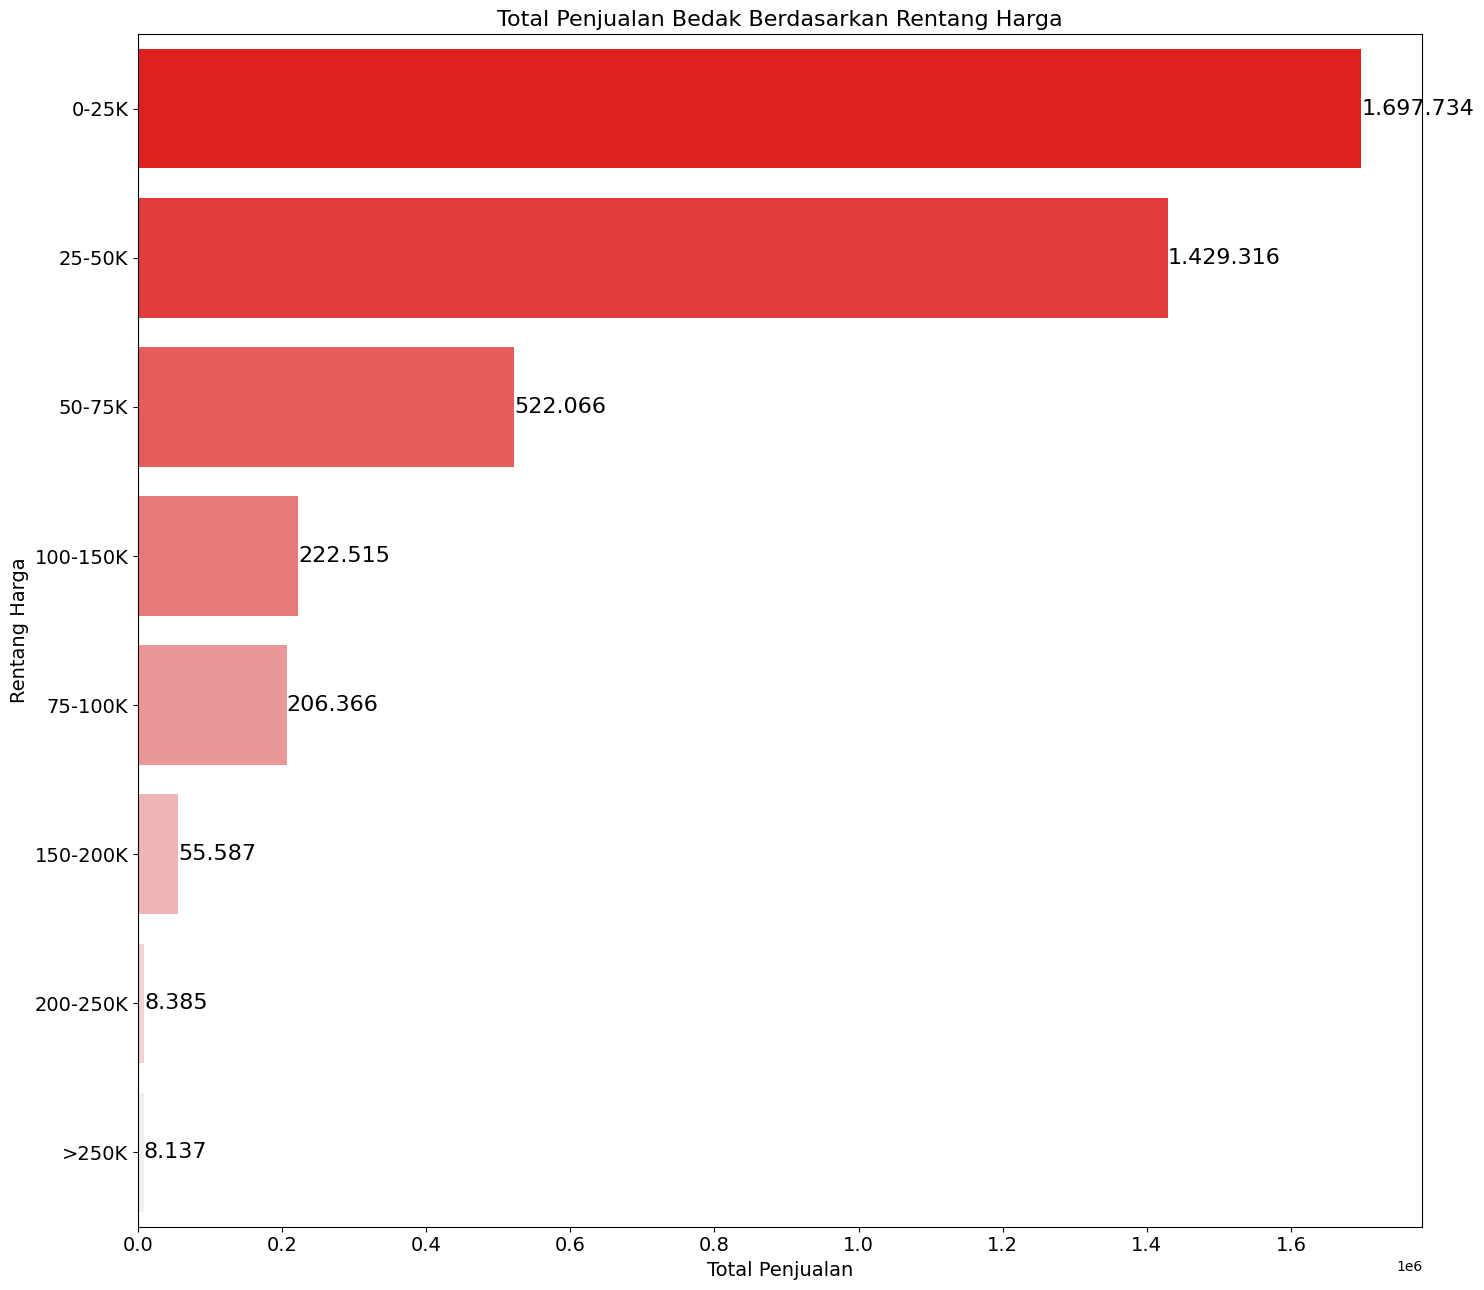

In [29]:
# Membuat klasifikasi rentang harga
def classify_price(saleprice):
    if saleprice <= 25000:
        return '0-25K'
    elif saleprice <= 50000:
        return '25-50K'
    elif saleprice <= 75000:
        return '50-75K'
    elif saleprice <= 100000:
        return '75-100K'
    elif saleprice <= 150000:
        return '100-150K'
    elif saleprice <= 200000:
        return '150-200K'
    elif saleprice <= 250000:
        return '200-250K'
    else:
        return '>250K'

df['price_range'] = df['saleprice'].apply(classify_price)

# Memisahkan data sunscreen dan bedak
df_sunscreen = df[df['categoryproduct'] == 'Sunscreen']
df_bedak = df[df['categoryproduct'] == 'Bedak']

# Menghitung total penjualan berdasarkan rentang harga untuk sunscreen dan bedak
price_summary_sunscreen = df_sunscreen.groupby('price_range')['daily_sales_count'].sum().reset_index().sort_values(by='daily_sales_count', ascending=False)
price_summary_bedak = df_bedak.groupby('price_range')['daily_sales_count'].sum().reset_index().sort_values(by='daily_sales_count', ascending=False)

# Visualisasi total penjualan berdasarkan rentang harga untuk sunscreen
plt.figure(figsize=(15, 13))
ax = sns.barplot(
    data=price_summary_sunscreen,
    y='price_range',
    x='daily_sales_count',
    palette=sns.light_palette("blue", n_colors=len(price_summary_sunscreen), reverse=True)
)
ax.set_title("Total Penjualan Sunscreen Berdasarkan Rentang Harga", fontsize=16)
ax.set_ylabel("Rentang Harga", fontsize=14)
ax.set_xlabel("Total Penjualan", fontsize=14)

# Menambahkan anotasi nilai pada setiap bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}'.replace(",", "."), (width, p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=16, color='black')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

# Visualisasi total penjualan berdasarkan rentang harga untuk bedak
plt.figure(figsize=(15, 13))
ax = sns.barplot(
    data=price_summary_bedak,
    y='price_range',
    x='daily_sales_count',
    palette=sns.light_palette("Red", n_colors=len(price_summary_bedak), reverse=True)
)
ax.set_title("Total Penjualan Bedak Berdasarkan Rentang Harga", fontsize=16)
ax.set_ylabel("Rentang Harga", fontsize=14)
ax.set_xlabel("Total Penjualan", fontsize=14)

# Menambahkan anotasi nilai pada setiap bar
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}'.replace(",", "."), (width, p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', fontsize=16, color='black')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

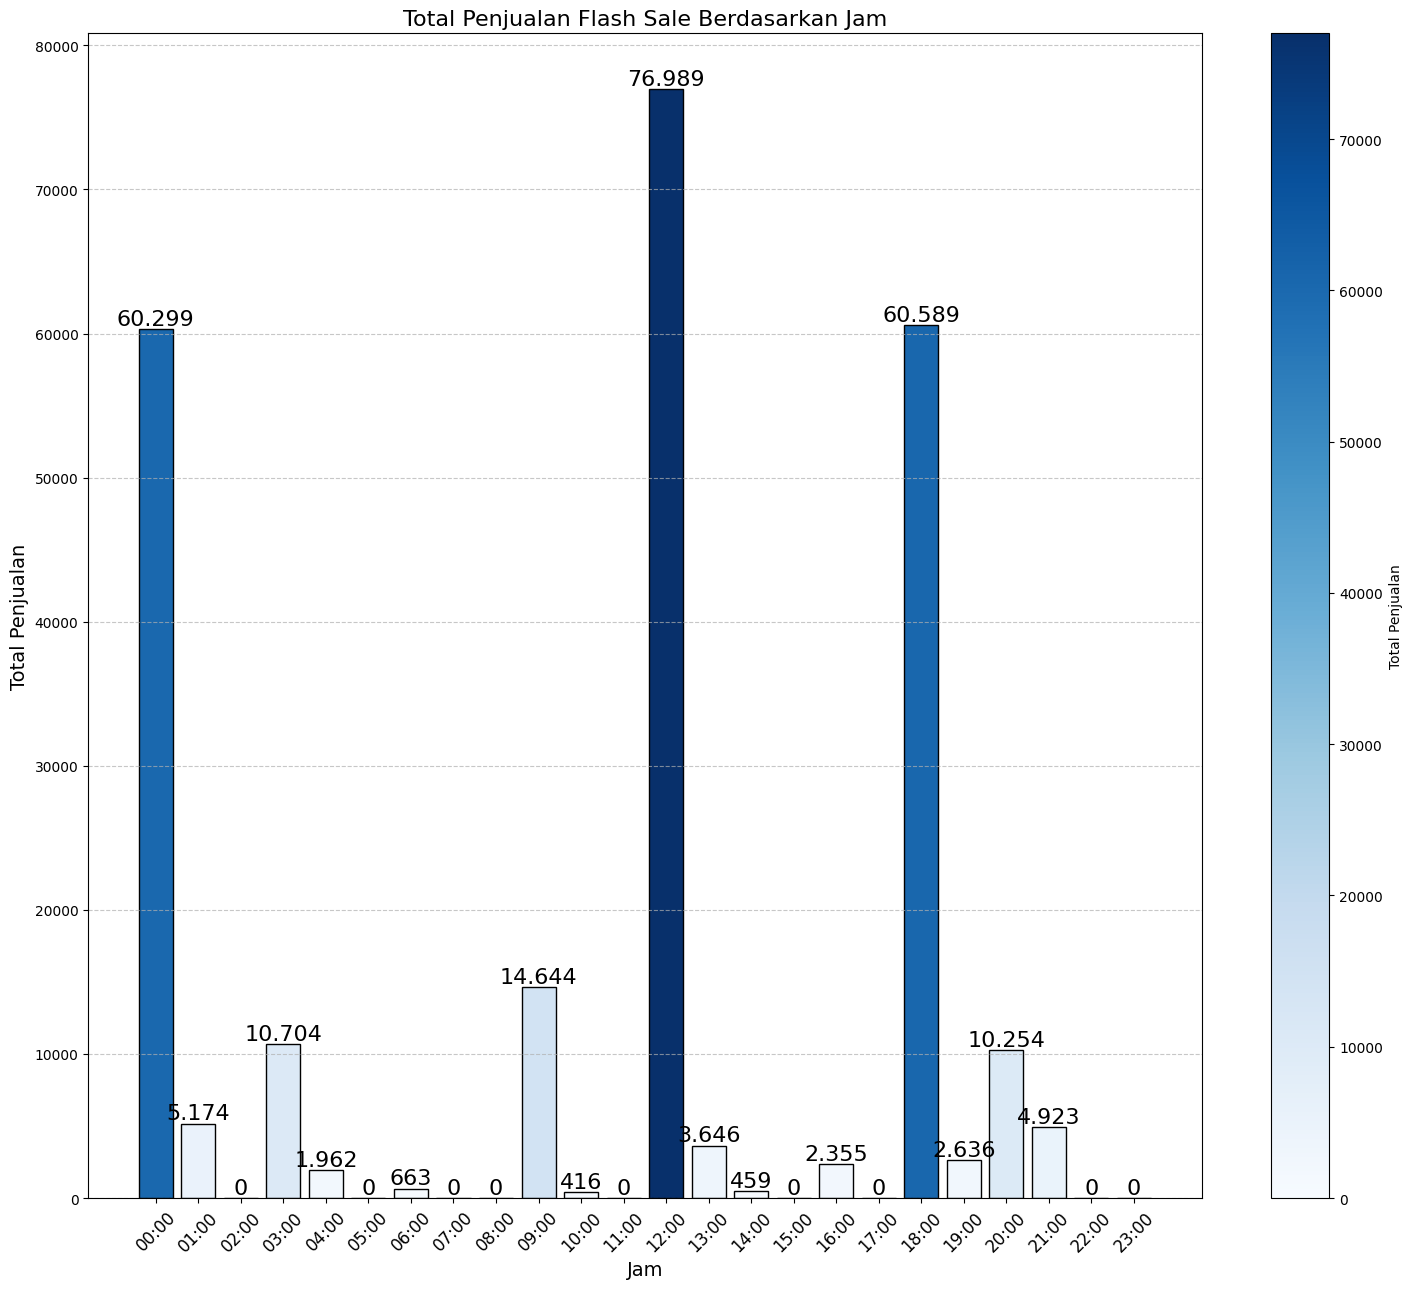

In [19]:
# Filter data untuk flash sale
flashsale_data = df[df['salestype'] == 'flashsale']

# Konversi waktu flash sale (fsid) ke format datetime jika belum dalam format datetime
flashsale_data['fsid'] = pd.to_datetime(flashsale_data['fsid'], format='%Y-%m-%d %H:%M:%S')

# Ekstrak jam dari waktu flash sale
flashsale_data['hour'] = flashsale_data['fsid'].dt.hour

# Menghitung total penjualan per jam
sales_by_hour = flashsale_data.groupby('hour')['daily_sales_count'].sum().reset_index()

# Pastikan semua jam dari 0 hingga 23 terwakili, meskipun penjualannya 0
sales_by_hour = sales_by_hour.set_index('hour').reindex(range(24), fill_value=0).reset_index()
sales_by_hour['hour_label'] = sales_by_hour['hour'].apply(lambda x: f"{x:02}:00")

# Normalisasi warna berdasarkan daily_sales_count
norm = plt.Normalize(sales_by_hour['daily_sales_count'].min(), sales_by_hour['daily_sales_count'].max())
colors = plt.cm.Blues(norm(sales_by_hour['daily_sales_count']))

# Visualisasi total penjualan per jam
fig, ax = plt.subplots(figsize=(15, 13))
bars = ax.bar(sales_by_hour['hour_label'], sales_by_hour['daily_sales_count'], color=colors, edgecolor='black')

# Tambahkan colorbar
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label="Total Penjualan")
cbar.ax.tick_params(labelsize=10)

# Tambahkan judul dan label
ax.set_title("Total Penjualan Flash Sale Berdasarkan Jam", fontsize=16)
ax.set_xlabel("Jam", fontsize=14)
ax.set_ylabel("Total Penjualan", fontsize=14)
ax.set_xticks(range(len(sales_by_hour['hour_label'])))
ax.set_xticklabels(sales_by_hour['hour_label'], rotation=45, fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label nilai pada setiap bar
for bar, height in zip(bars, sales_by_hour['daily_sales_count']):
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height):,}'.replace(",", "."), 
             ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.show()